In [6]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, KFold

In [7]:
df = pd.read_csv('Cleaned_Stats.csv')

In [8]:
X = df.drop(['pick','Drafted','pid'],axis=1)
y = df['pick']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y, random_state=42)

In [10]:
Xgboost_Pipeline = Pipeline([('scaler', StandardScaler()),
                             ('xgboost', XGBRegressor())])

In [11]:
param_grid = {
    'xgboost__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgboost__n_estimators': [300, 400, 500],
    'xgboost__max_depth': [4, 5, 6]}

In [12]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
grid_search = GridSearchCV(Xgboost_Pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error')


In [14]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgboost',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=Non...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgboost__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'xgboost__max_depth': [4, 5, 6],
                         'xgboost__n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error')

In [15]:
print("The best hyperparameters are ", grid_search.best_params_)

The best hyperparameters are  {'xgboost__learning_rate': 0.01, 'xgboost__max_depth': 4, 'xgboost__n_estimators': 500}


In [16]:
#Apply best hyperparameters to pipeline
best_pipeline = grid_search.best_estimator_

In [17]:
y_pred = best_pipeline.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 13.513373364608407


In [19]:
predictions = best_pipeline.predict(X)

In [20]:
predictions_df = pd.DataFrame({'Pick_Prediction': predictions})

In [21]:
combined_data = pd.concat([df, predictions_df], axis = 1)

In [22]:
combined_data[['pick','Pick_Prediction']]

,pick,Pick_Prediction
0,61.0,61.014915
1,61.0,61.032825
2,61.0,61.014915
3,61.0,61.014915
4,61.0,61.014915
...,...,...
25740,61.0,55.143269
25741,61.0,61.014915
25742,61.0,61.014915
25743,61.0,61.014915


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

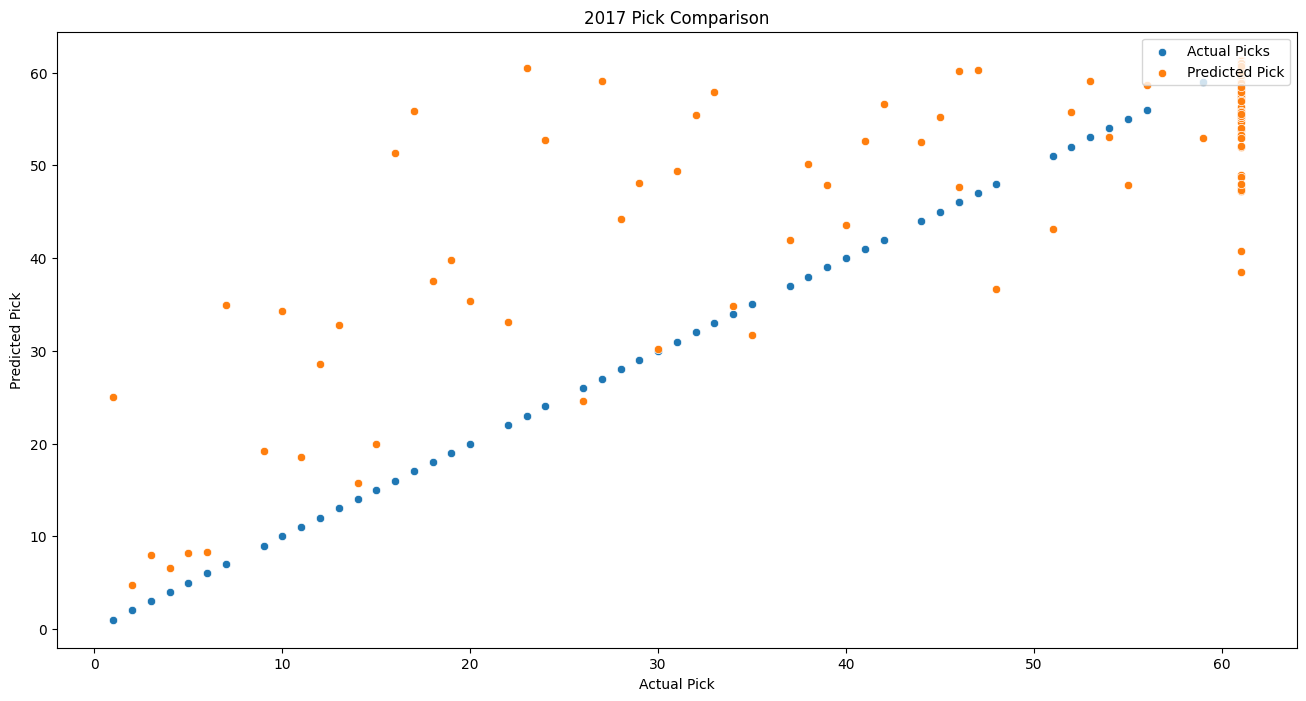

In [24]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data = combined_data[combined_data['year']==2017], x = 'pick', y = 'pick', label = 'Actual Picks')
sns.scatterplot(data = combined_data[combined_data['year']==2017], x = 'pick', y = 'Pick_Prediction', label = 'Predicted Pick')
plt.xlabel('Actual Pick')
plt.ylabel('Predicted Pick')
plt.legend(loc = 'upper right')
plt.title('2017 Pick Comparison')
plt.show()

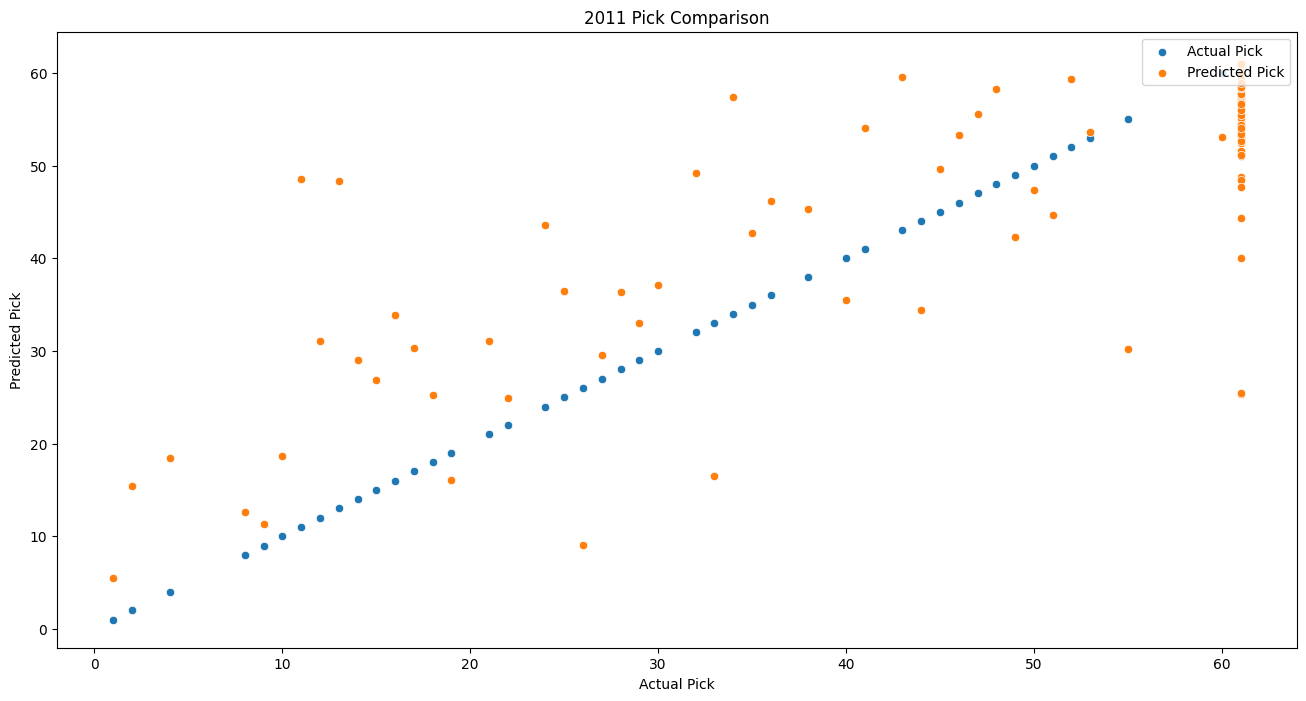

In [25]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data = combined_data[combined_data['year']==2011], x = 'pick', y = 'pick', label = 'Actual Pick')
sns.scatterplot(data = combined_data[combined_data['year']==2011], x = 'pick', y = 'Pick_Prediction', label = 'Predicted Pick')
plt.xlabel('Actual Pick')
plt.ylabel('Predicted Pick')
plt.legend(loc = 'upper right')
plt.title('2011 Pick Comparison')
plt.show()

In [28]:
combined_data[(combined_data['year']==2017)&(combined_data['Drafted']==1)][['pid','pick','Pick_Prediction']]

,pid,pick,Pick_Prediction
10980,28767,37.0,41.922752
11175,29335,33.0,57.919682
11348,29744,54.0,53.026585
11385,29814,48.0,36.655258
11776,30917,59.0,52.928661
11950,31372,56.0,58.681999
12067,31708,32.0,55.399944
12557,32989,46.0,47.691944
12624,33186,55.0,47.853867
12706,33417,30.0,30.184296
